## KNN - Kernel Regression - Bias Variance trade-off

installiere auch Abhängigkeit ‘igraph’





Die heruntergeladenen Binärpakete sind in 
	/var/folders/l3/y5cy7ggn5k9gr6lz1n_7jv7m0000gn/T//RtmpZZAavf/downloaded_packages


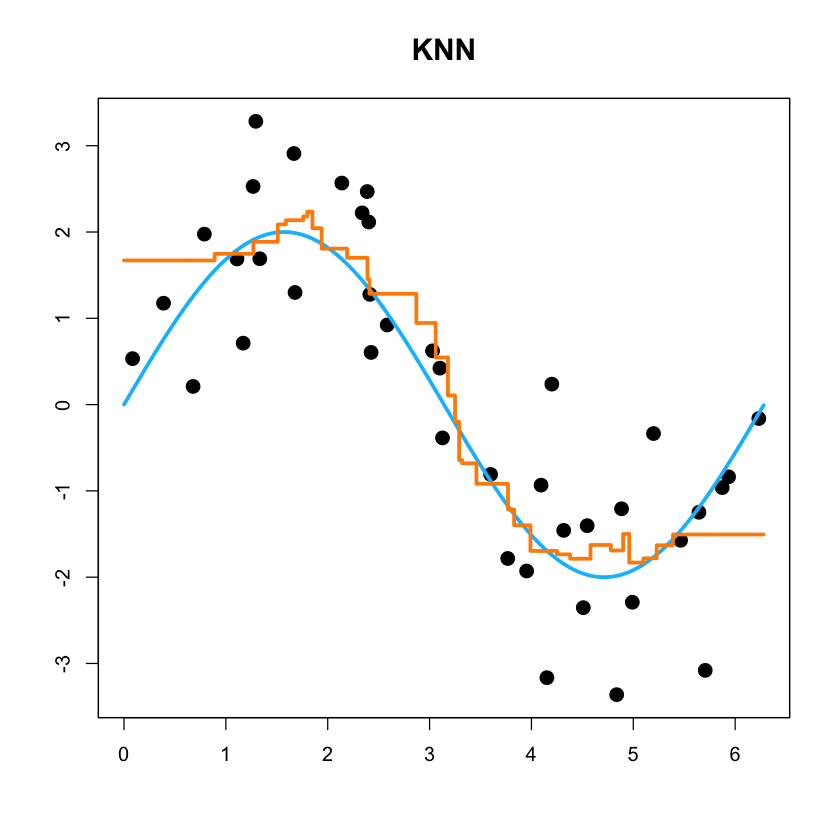

In [18]:
   # generate some data
set.seed(1)
x <- runif(40, 0, 2*pi)
y <- 2*sin(x) + rnorm(length(x))
testx = seq(0, 2*pi, 0.01)
    
    # compare two methods: KNN or Kernel regression
install.packages("kknn")
library(kknn)
knn.fit = kknn(y ~ x, train = data.frame("x" = x, "y" = y),
                test = data.frame("x" = testx), k = 10, kernel = "rectangular")
    
plot(x, y, xlim = c(0, 2*pi), cex = 1.5, xlab = "", ylab = "", 
         cex.lab = 1.5, pch = 19)
title(main=paste("KNN"), cex.main = 1.5)
    
    # true function 
lines(testx, 2*sin(testx), col = "deepskyblue", lwd = 3)
    
    # KNN estimated function
lines(testx, knn.fit$fitted.values, type = "s", col = "darkorange", lwd = 3)
box()


Die heruntergeladenen Binärpakete sind in 
	/var/folders/l3/y5cy7ggn5k9gr6lz1n_7jv7m0000gn/T//RtmpZZAavf/downloaded_packages


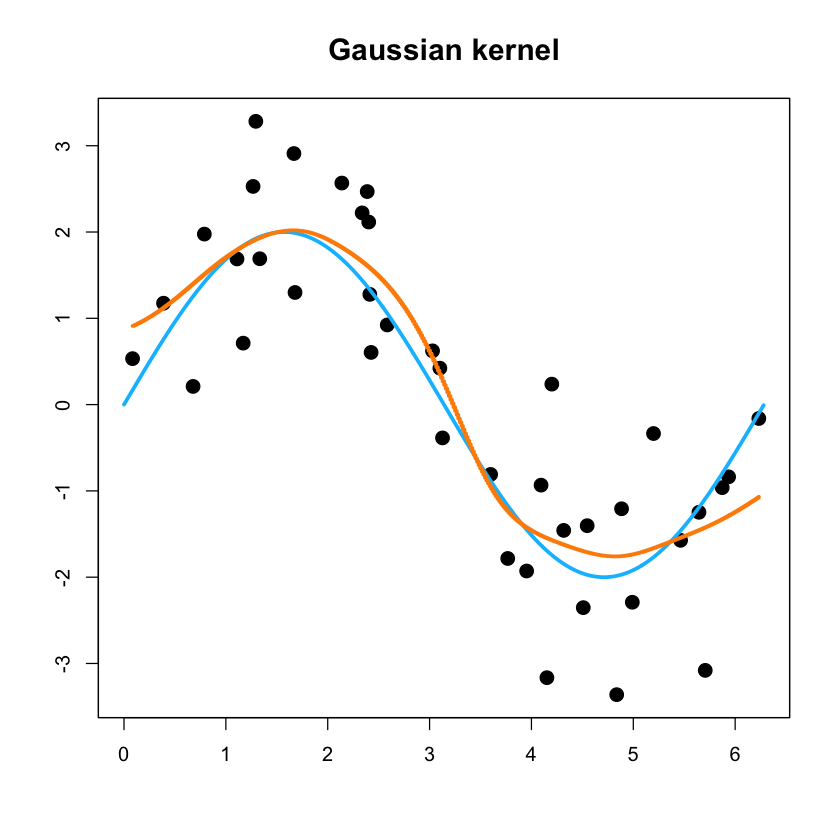

In [20]:
   
    # we use the locpoly() function from the KernSmooth package
    # please be careful about the parameter "bandwidth"
    # This will be discussed later
install.packages("KernSmooth")
library(KernSmooth)
## KernSmooth 2.23 loaded
## Copyright M. P. Wand 1997-2009
NW.fit = locpoly(x, y, degree = 0, bandwidth = sd(x)*0.25,
                     kernel = "normal")

plot(x, y, xlim = c(0, 2*pi), cex = 1.5, xlab = "", ylab = "", 
         cex.lab = 1.5, pch = 19)
title(main=paste("Gaussian kernel"), cex.main = 1.5)
    
    # the true function 
lines(testx, 2*sin(testx), col = "deepskyblue", lwd = 3)
    
    # Kernel estimated function
lines(NW.fit$x, NW.fit$y, type = "s", col = "darkorange", lwd = 3)
box()

## Kernel Regression

### Gaussian Kernel Regression

First, let’s introduce a kernel function. In most applications, we will consider using density functions as a kernel. For most of this discussion, we will only consider 1-dimensional kernels. Then we have

$$
K_h(u, v) = \frac{K\left(\left| u - v \right| / h\right)}{h}
$$

where the function \( K(\cdot) \) is a density function of a random variable. \( h \) plays a very important role, but we will introduce that later. For now, if we consider the standard normal distribution density function (pdf), we have

$$
K(t) = \frac{1}{\sqrt{2 \pi}} \exp \left\{ -\frac{t^2}{2} \right\}.
$$

Then we can plug in \( t = \frac{|u - v|}{h} \) for any two data points \( u \) and \( v \). This leads to

$$
K_h(u, v) = \frac{1}{h \sqrt{2 \pi}} \exp \left\{ -\frac{(u - v)^2}{2 h^2} \right\}.
$$

Recall that the Nadaraya-Watson (NW) kernel regression is given by

$$
\hat{f}(x_0) = \frac{\sum_i K_h(x_0, x_i) y_i}{\sum_i K_h(x_0, x_i)}.
$$

The quantity \( K_h(x_0, x_i) \) is the kernel weight of the \( i \)-th subject when estimating the function value at the target point \( x_0 \). Let’s calculate this quantity and the NW estimator at a target point using our own code:


In [24]:
# Load KernSmooth for local polynomial smoothing (locpoly function)
if (!require(KernSmooth)) install.packages("KernSmooth")
library(KernSmooth)

# Base packages like stats and graphics are automatically loaded in R


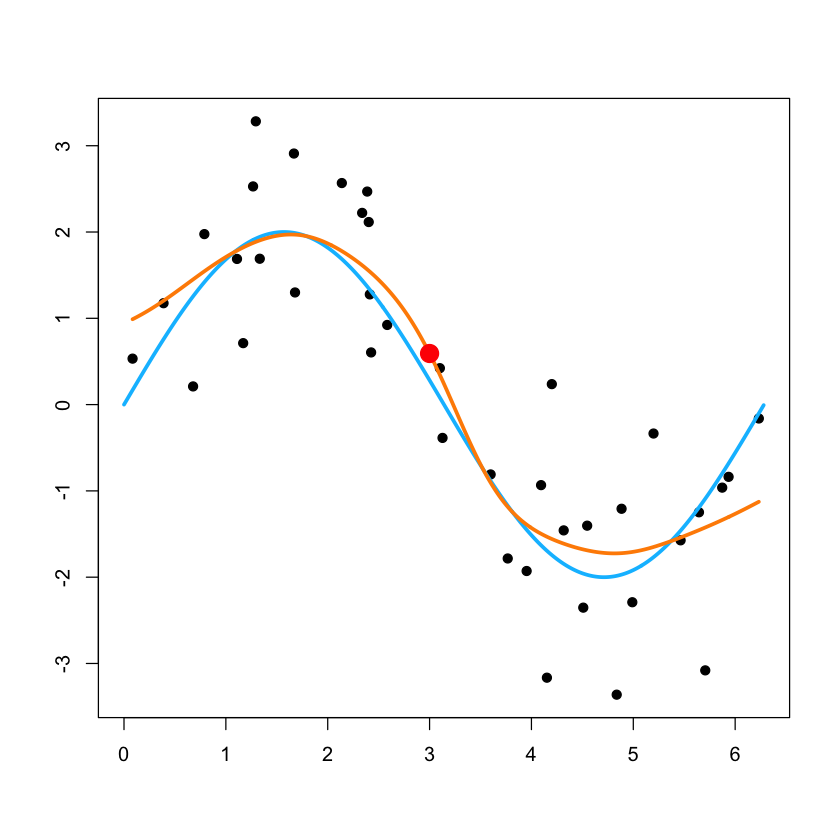

In [26]:
  # the target point
  x0 = 3
  
  # the observed data 
  set.seed(1)
  x <- runif(40, 0, 2*pi)
  y <- 2*sin(x) + rnorm(length(x))
    
  # the kernel weights for each observation 
  # lets use a bandwidth = 0.5
  h = 0.5
  # calculate the kernel weights
  w = dnorm( (x0 - x)/h )/h
  # calculate the NW estimator 
  fhat = sum(w*y)/sum(w)
  
  est <- locpoly(x, y, degree = 0, bandwidth = h,
                 kernel = "normal")

  plot(x, y, xlim = c(0, 2*pi), xlab = "", ylab = "", cex.lab = 1.5, pch = 19)
  
  # the true function 
  lines(testx, 2*sin(testx), col = "deepskyblue", lwd = 3)
  
  # NW estimated function using locpoly
  lines(est$x, est$y, col = "darkorange", lwd = 3)
  
  # estimated using our own code
  points(x0, fhat, col = "red", pch = 19, cex = 2)

## Basic Idea Behind Local Averaging

At each target point $\( x \)$, training data points $\( x_i \)$ that are closer to $\( x \)$ receive higher weights $\( K_h(x, x_i) \)$, hence their $\( y_i \)$ values are more influential in terms of estimating $\( f(x) \)$.



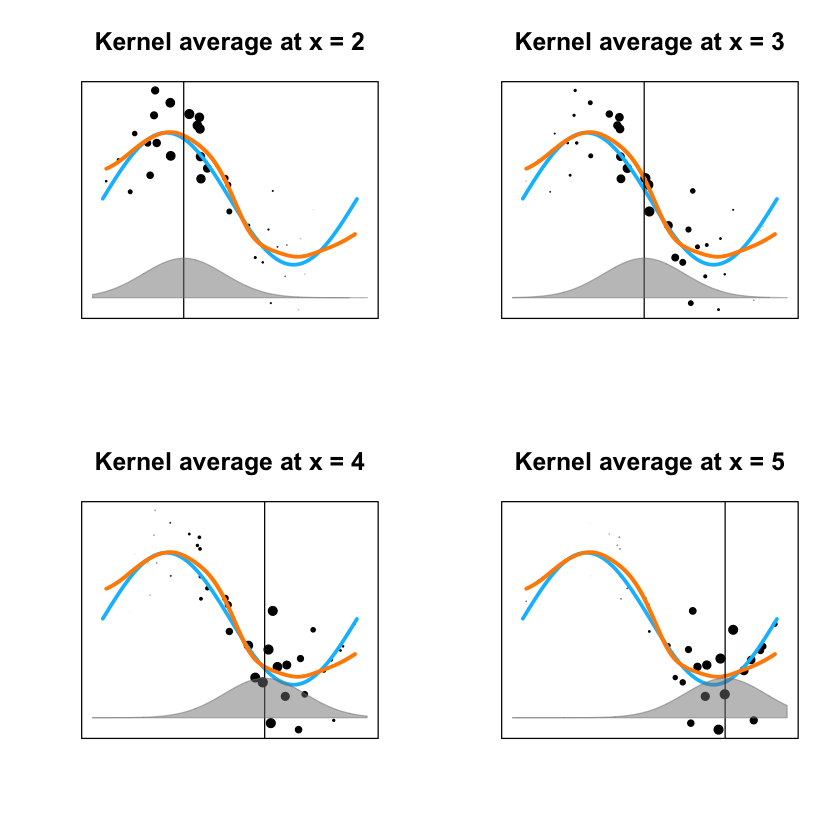

In [30]:
    par(mfrow = c(2, 2))

    # generate some data
    set.seed(1)    
    x <- runif(40, 0, 2*pi)
    y <- 2*sin(x) + rnorm(length(x))
    testx = seq(0, 2*pi, 0.01)
    
    # plots for different h values
    for (x0 in c(2, 3, 4, 5))
    {
        # local points, with size proportional to their influence
        plot(x, y, xlim = c(-0.25, 2*pi+0.25), cex = 3*dnorm(x, x0), xlab = "", ylab = "", 
             cex.lab = 1.5, pch = 19, xaxt='n', yaxt='n')
        title(main=paste("Kernel average at x =", x0), cex.main = 1.5)
        
        # the true function 
        lines(testx, 2*sin(testx), col = "deepskyblue", lwd = 3)
        
        # the estimated function 
        lines(NW.fit$x, NW.fit$y, type = "s", col = "darkorange", lwd = 3)
        
        # the target point
        abline(v = x0)
        
        # the local density around the target point
        # The Gaussian Kernel Function in the shaded area        
        cord.x <- seq(-0.25, 2*pi+0.25, 0.01)
        cord.y <- 3*dnorm(cord.x, x0) - 3 # Gaussian density with h = 1

        polygon(c(-0.25, cord.x, 2*pi+0.25),
                c(-3, cord.y, -3),
                col=rgb(0.5, 0.5, 0.5, 0.5), 
                border = rgb(0.5, 0.5, 0.5, 0.5))
    }

## Bias Variance trade-off

## Bias-Variance Trade-off

The bandwidth \( h \) is an important tuning parameter that controls the bias-variance trade-off. It behaves similarly to the KNN. By setting a large \( h \), the estimator is more stable but has more bias.


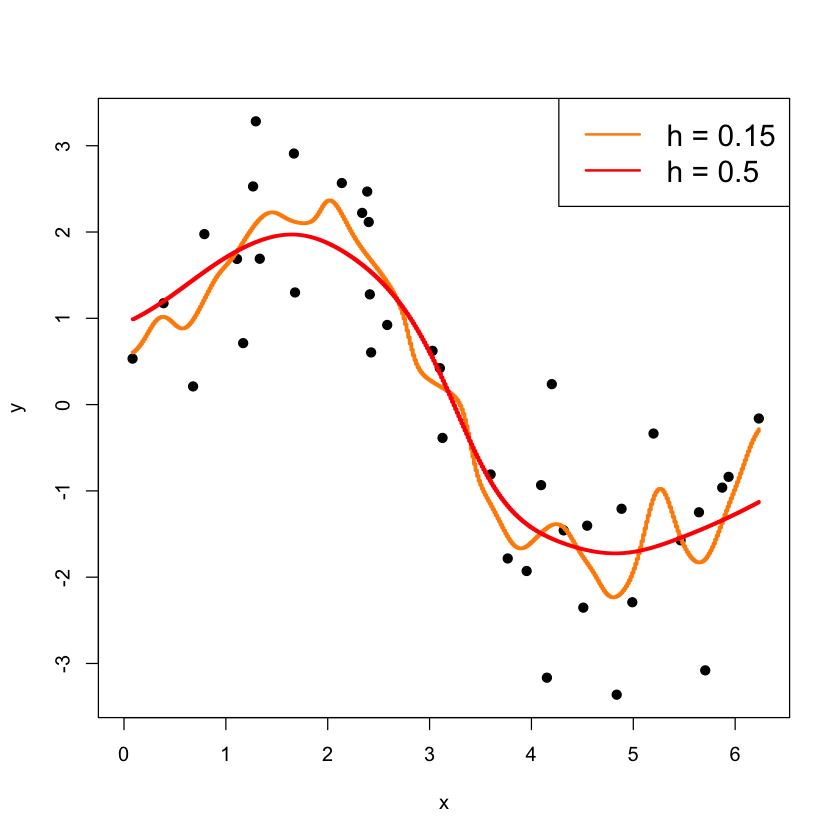

In [36]:
  # a small bandwidth
  NW.fit1 = locpoly(x, y, degree = 0, bandwidth = 0.15, kernel = "normal")

  # a large bandwidth
  NW.fit2 = locpoly(x, y, degree = 0, bandwidth = 0.5, kernel = "normal")
  
  # plot both
  plot(x, y, xlim = c(0, 2*pi), pch = 19)
  lines(NW.fit1$x, NW.fit1$y, type = "s", col = "darkorange", lwd = 3)
  lines(NW.fit2$x, NW.fit2$y, type = "s", col = "red", lwd = 3)
  legend("topright", c("h = 0.15", "h = 0.5"), col = c("darkorange", "red"), 
         lty = 1, lwd = 2, cex = 1.5)

## The Effect of \( h \) in Comparison to \( k \) in KNN

The effect of \( h \) is similar to \( k \) in KNN:

As \( h \) increases, we are using a “larger” neighborhood (more points receive significantly heavy weights) of the target point \( x_0 \) for the weighted average. Hence, the estimation is more stable, i.e., smaller variance. But this would introduce a larger bias because the neighborhood can already be far away.


## Local Linear Regression

Local averaging will suffer severe bias at the boundaries. One solution is to use local polynomial regression. The following examples are local linear regressions, evaluated at different target points. We are solving for a linear model weighted by the kernel weights:

$$
\sum_{i=1}^{n} K_h(x, x_i) \left( y_i - \beta_0 - \beta_1 x_i \right)^2
$$


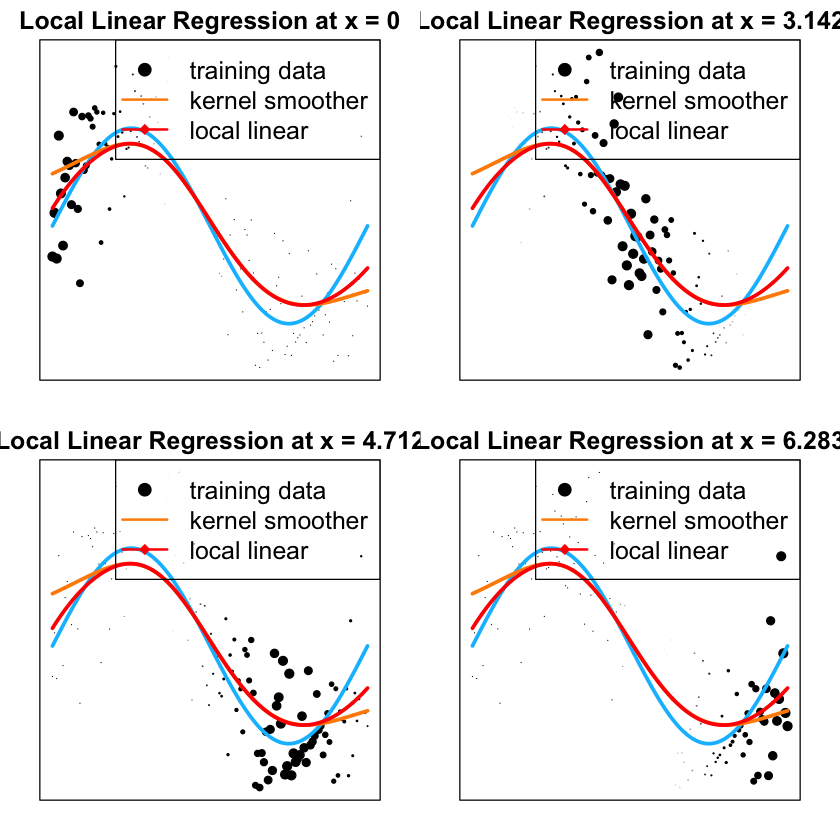

In [42]:
    # generate some data
    set.seed(1)
    n = 150
    x <- seq(0, 2*pi, length.out = n)
    y <- 2*sin(x) + rnorm(length(x))
    
    #Silverman optimal bandwidth for univariate regression
    h = 1.06*sd(x)*n^(-1/5) 

    par(mfrow = c(2, 2), mar=rep(2, 4))
        
    for (x0 in c(0, pi, 1.5*pi, 2*pi))
    {
        # Plotting the data
        plot(x, y, xlim = c(0, 2*pi), cex = 3*h*dnorm(x, x0, h), xlab = "", ylab = "", 
             cex.lab = 1.5, pch = 19, xaxt='n', yaxt='n')
        title(main=paste("Local Linear Regression at x =", round(x0, 3)), cex.main = 1.5)
        lines(x, 2*sin(x), col = "deepskyblue", lwd = 3)
        
        # kernel smoother
        NW.fit = locpoly(x, y, degree = 0, bandwidth = h, kernel = "normal")
        lines(NW.fit$x, NW.fit$y, type = "l", col = "darkorange", lwd = 3)

        # local linear
        locallinear.fit = locpoly(x, y, degree = 1, bandwidth = h, kernel = "normal")
        lines(locallinear.fit$x, locallinear.fit$y, type = "l", col = "red", lwd = 3)

        legend("topright", c("training data", "kernel smoother", "local linear"), 
               lty = c(0, 1, 1), col = c(1, "darkorange", "red"), 
               lwd = 2, pch = c(19, NA, 18), cex = 1.5)
    }